In [1]:
import matplotlib.pyplot as plt
from mxlpy.types import unwrap, unwrap2
from mxlpy import Model
from mxlpy import Simulator, plot
import numpy as np
import mxlbricks.names as n
import pandas as pd
import math

In [2]:
from josha import get_delta_psi_Li
m = get_delta_psi_Li()

m.get_stoichiometries()

,vB6f,vPSI_PC_oxidation,vNDH1,vPGR,vPSII,vATPsynthase,vClCe,vKEA3,vPSII_charge_separation,vRecomb_PSII,vVCCN1,vVoltageK_channel,vPSI_charge_separation,vFNR,vMehler,vVDE,vCBB_consumption
PC_red,1.000000,-1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0
PC_ox,-1.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0
PQH2,-0.500000,0.0,0.500000,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0
PQ_ox,0.500000,0.0,-0.500000,-0.5,-0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0
pHlumen,-0.083857,0.0,-0.083857,0.0,0.0,0.195667,0.041929,0.041929,-0.041929,0.041929,0.000000,0.000000,0.000,0.0,0.0,0.0,0.0
delta_psi,0.047000,0.0,0.094000,0.0,0.0,-0.219333,-0.047000,0.000000,0.047000,-0.047000,-0.047000,-0.047000,0.047,0.0,0.0,0.0,0.0
Fd_red,0.000000,0.0,-1.000000,-1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000,-1.0,-1.0,0.0,0.0
Fd_ox,0.000000,0.0,1.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000,1.0,1.0,0.0,0.0
vea,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,-1.0,0.0
zea,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0,0.0,1.0,0.0


In [3]:
stoics = get_delta_psi_Li().get_stoichiometries().loc["NADPH"]

stoics[stoics != 0]

vFNR                0.5
vCBB_consumption   -0.5
Name: NADPH, dtype: float64

# Josha Update

In [4]:
from mxlpy import Derived
from mxlbricks.fns import moiety_1, mul, neg, value, neg_div, div, twice

def neg_point_two_val(x: float):
    return -0.1 * x

def neg_thrice(x: float):
    return x * -3

def _v_ZE(Z, kZE):
    return Z * kZE

def _kCBB(PAR):
    return 60 * (PAR/(PAR+250))


josha_new = get_delta_psi_Li()

# Changed stochiometries
josha_new.update_reaction(
    name="vClCe",
    stoichiometry={
        "Cl_lumen": Derived(fn=twice, args=["lumen_ions_per_turnover"]),
        "Cl_stroma": Derived(fn=neg_point_two_val, args=["lumen_ions_per_turnover"]),
        "pHlumen": Derived(fn=div, args=["lumen_ions_per_turnover", "buffering_capacity"]),
        "delta_psi": Derived(fn=neg_thrice, args=["volts_per_charge"])
    }
)
josha_new.update_reaction(
    name="vCBB_consumption",
    stoichiometry={
        "NADPH": -1,
        "NADP": 1
    }
)

# Missing zeaxanthin epoxidase
josha_new.add_reaction(
        "v_ZE",
        fn=_v_ZE,
        args=["zea", "kZE"],
        stoichiometry={
            "zea": -1
        }
    )

# Remove Redundant Variables
josha_new.add_parameters({
    "QA_total": 1,
    n.total_pq(): 7,
    "P700_total": 0.667,
    n.total_pc(): 2,
    n.total_ferredoxin(): 1,
    n.total_nadp(): 5,
    n.total_carotenoids(): 1
})

to_remove = ["vea", "QA", "P700_red", "PQ_ox", "PC_red", "Fd_ox", "NADP"]
josha_new.remove_variables(to_remove)

josha_new.add_derived(
    "vea",
    fn=moiety_1,
    args=["zea", n.total_carotenoids()]
)
josha_new.add_derived(
    "QA",
    fn=moiety_1,
    args=["QAm", "QA_total"]
)
josha_new.add_derived(
    "P700_red",
    fn=moiety_1,
    args=["P700_ox", "P700_total"]
)
josha_new.add_derived(
    "PQ_ox",
    fn=moiety_1,
    args=["PQH2", n.total_pq()]
)
josha_new.add_derived(
    "PC_red",
    fn=moiety_1,
    args=["PC_ox", n.total_pc()]
)
josha_new.add_derived(
    "Fd_ox",
    fn=moiety_1,
    args=["Fd_red", n.total_ferredoxin()]
)
josha_new.add_derived(
    "NADP",
    fn=moiety_1,
    args=["NADPH", n.total_nadp()]
)

for name in to_remove:
    for reaction in josha_new._reactions.values():
        if name in reaction.stoichiometry:
            reaction.stoichiometry.pop(name)

# kCBB calculation from code
josha_new.remove_parameter("kCBB")

josha_new.add_derived(
    name="kCBB",
    fn=_kCBB,
    args=["PAR"]
)

;

''

In [5]:
stoics = josha_new.get_stoichiometries().loc["zea"]

stoics[stoics != 0]

vVDE    1.0
v_ZE   -1.0
Name: zea, dtype: float64

In [6]:
def simulate_fig3(m_100: Model, m_500: Model):
    par_str = "PAR"
    
    s_100=Simulator(m_100)
    s_100.update_parameter(par_str, 100)
    s_100.simulate(20*60)
    res_100, flux_100 = s_100.get_result()
    
    
    
    s_100 = Simulator(m_100)
    for var in m_100.get_variable_names():
        s_100.update_variable(var, res_100.iloc[-1][var])
    s_100.update_parameter(par_str, 0)
    s_100.simulate(5 * 60)
    new_var, flux_var = s_100.get_result()
    new_var.index = new_var.index + res_100.index[-1]
    flux_var.index = flux_var.index + flux_100.index[-1]
    
    res_100 = pd.concat([res_100, new_var], sort=False)
    flux_100 = pd.concat([flux_100, flux_var], sort=False)

    s_500=Simulator(m_500)
    s_500.update_parameter(par_str, 500)
    s_500.simulate(20*60)
    res_500, _: s_500.get_result()
    
    s_500: Simulator(m_500)
    s_500.update_variables(res_500.to_dict())
    s_500.update_parameter(par_str, 0)
    s_500.simulate(5 * 60)
    new, _ = s_500.get_result()
    new.index = new.index + res_500.index[-1]
    
    res_500 = pd.concat([res_500, new], sort=False)
    
    return (res_100, flux_100), res_500

def create_fig3(m_100: Model, m_500: Model) -> tuple:
    par_str = "PAR"
    
    s_100=Simulator(m_100)
    s_100.update_parameter(par_str, 100)
    s_100.simulate(20*60)
    s_100.update_parameter(par_str, 0)
    s_100.simulate(1500)
    res_100, _ = s_100.get_result()

    s_500 = Simulator(m_500)
    s_500.update_parameter(par_str, 500)
    s_500.simulate(20*60)
    s_500.update_parameter(par_str, 0)
    s_500.simulate(1500)
    res_500, _ = s_500.get_result()
    
    fig3, axs = plt.subplots(ncols=3, figsize=(15, 4))

    for res, color in zip([res_100, res_500], ["black", "red"]):
        axs[0].plot(res.index, 1-res["QAm"], color=color)
        axs[1].plot(res.index, res["PhiPSII"], color=color)
        axs[2].plot(res.index, res["NPQ"], color=color)

    for ax in axs:
        ax.set_xlim(0, 25*60)

    axs[0].set_ylim(0, 1.2)
    axs[1].set_ylim(0, 1.0)
    axs[2].set_ylim(0, 2.5)

    return fig3, axs

SyntaxError: only single target (not tuple) can be annotated (745426425.py, line 26)

Josha Version

In [ ]:
from deltapsi_leaf_new import sim_a_gtype

res_dict_new = {}

for key in ["WT"]:
    for par in [100, 500]:
        if res_dict_new.get(key) is None:
            res_dict_new[key] = {}
        res_dict_new[key][str(par)] = sim_a_gtype({}, key, par)

(6.2, 1, 1000, 300.0, 0.000587, np.float64(0.0), 200.0, 0.5, 0.047, 150, 4.666666666666667, 0.11, 0.37, -0.42, 0.5, 0.014, 0.08, 5.65, 4, 0.004, 6.2, 3, 0.33, 5000, 0.45, 1, 0.25, 1000, 17.142857142857142, 2500000, 12, 800000, 1000.0) (6.2, 1, 1000, 300.0, 0.000587, np.float64(2.0202020202020203), 200.0, 0.5, 0.047, 150, 4.666666666666667, 0.11, 0.37, -0.42, 0.5, 0.014, 0.08, 5.65, 4, 0.004, 6.2, 3, 0.33, 5000, 0.45, 1, 0.25, 1000, 17.142857142857142, 2500000, 12, 800000, 1000.0)
Change Constants


Changed Parameter,Old Value,New Value
k_CBC,60,17.142857142857142


(6.2, 1, 1000, 300.0, 0.000587, np.float64(0.0), 200.0, 0.5, 0.047, 150, 4.666666666666667, 0.11, 0.37, -0.42, 0.5, 0.014, 0.08, 5.65, 4, 0.004, 6.2, 3, 0.33, 5000, 0.45, 1, 0.25, 1000, 40.0, 2500000, 12, 800000, 1000.0) (6.2, 1, 1000, 300.0, 0.000587, np.float64(10.1010101010101), 200.0, 0.5, 0.047, 150, 4.666666666666667, 0.11, 0.37, -0.42, 0.5, 0.014, 0.08, 5.65, 4, 0.004, 6.2, 3, 0.33, 5000, 0.45, 1, 0.25, 1000, 40.0, 2500000, 12, 800000, 1000.0)
Change Constants


Changed Parameter,Old Value,New Value
k_CBC,60,40.0


TypeError: unsupported operand type(s) for /: 'builtin_function_or_method' and 'int'

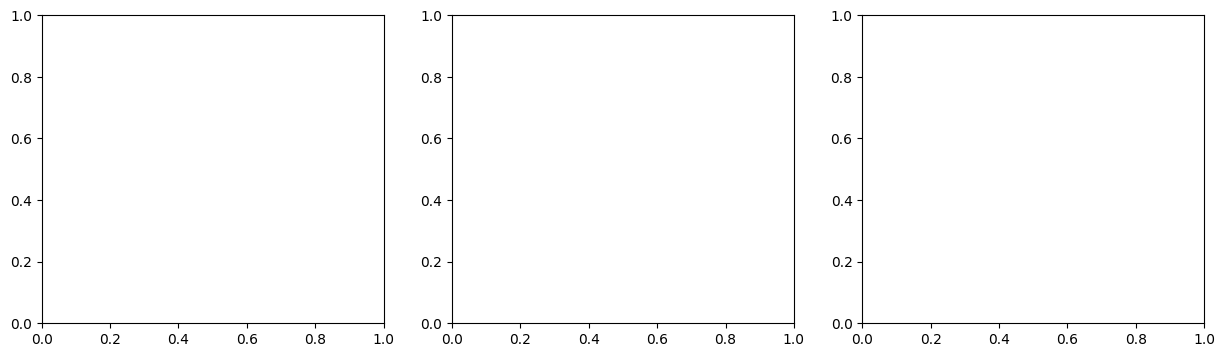

In [ ]:
old_100, old_500 = simulate_fig3(get_delta_psi_Li(), get_delta_psi_Li())

new_100, new_500 = simulate_fig3(josha_new, josha_new)

fig3, axs = plt.subplots(ncols=3, figsize=(15, 4))

for res, color in zip([old_100, old_500], ["black", "red"]):
    axs[0].plot(res.index / 60, 1-res["QAm"], color=color, ls="dashed")
    axs[1].plot(res.index / 60, res["PhiPSII"], color=color, ls="dashed")
    axs[2].plot(res.index / 60, res["NPQ"], color=color, ls="dashed")
    
for res, color in zip([new_100, new_500], ["black", "red"]):
    axs[0].plot(res.index / 60, 1-res["QAm"], color=color)
    axs[1].plot(res.index / 60, res["PhiPSII"], color=color)
    axs[2].plot(res.index / 60, res["NPQ"], color=color)
    
for res, color in zip([res_dict_new["WT"]["100"], res_dict_new["WT"]["500"]], ["black", "red"]):
    axs[0].plot(res["time_axis_min"], 1-res["QAm"], color=color, ls="dotted")
    axs[1].plot(res["time_axis_min"], res["Phi2"], color=color, ls="dotted")
    axs[2].plot(res["time_axis_min"], res["NPQ"], color=color, ls="dotted")

for ax in axs:
    ax.set_xlim(0, 25)

axs[0].set_ylim(0, 1.2)
axs[1].set_ylim(0, 1.0)
axs[2].set_ylim(0, 2.5)

plt.show()

TypeError: unsupported operand type(s) for /: 'builtin_function_or_method' and 'int'

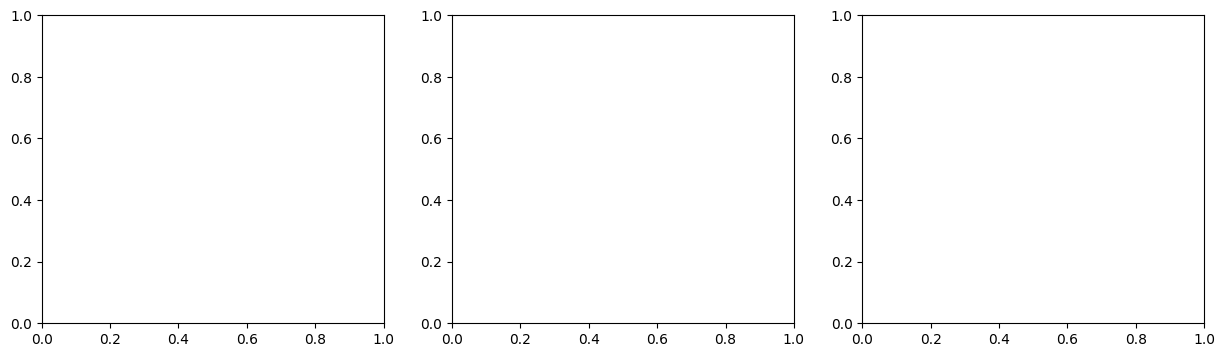

In [ ]:
from mxlpy_version import get_li2021

res_100, res_500 = simulate_fig3(get_li2021(), get_li2021())

fig3, axs = plt.subplots(ncols=3, figsize=(15, 4))

for res, color in zip([res_100, res_500], ["black", "red"]):
    axs[0].plot(res.index / 60, 1-res["QA_red"], color=color)
    axs[1].plot(res.index / 60, res["Phi2"], color=color)
    axs[2].plot(res.index / 60, res["NPQ"], color=color)
    
for res, color in zip([res_dict_new["WT"]["100"], res_dict_new["WT"]["500"]], ["black", "red"]):
    axs[0].plot(res["time_axis_min"], 1-res["QAm"], color=color, ls="dotted")
    axs[1].plot(res["time_axis_min"], res["Phi2"], color=color, ls="dotted")
    axs[2].plot(res["time_axis_min"], res["NPQ"], color=color, ls="dotted")

for ax in axs:
    ax.set_xlim(0, 25)

axs[0].set_ylim(0, 1.2)
axs[1].set_ylim(0, 1.0)
axs[2].set_ylim(0, 2.5)

plt.show()

Simulating 'vccn1clce2kea3' in mxlpy: 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]


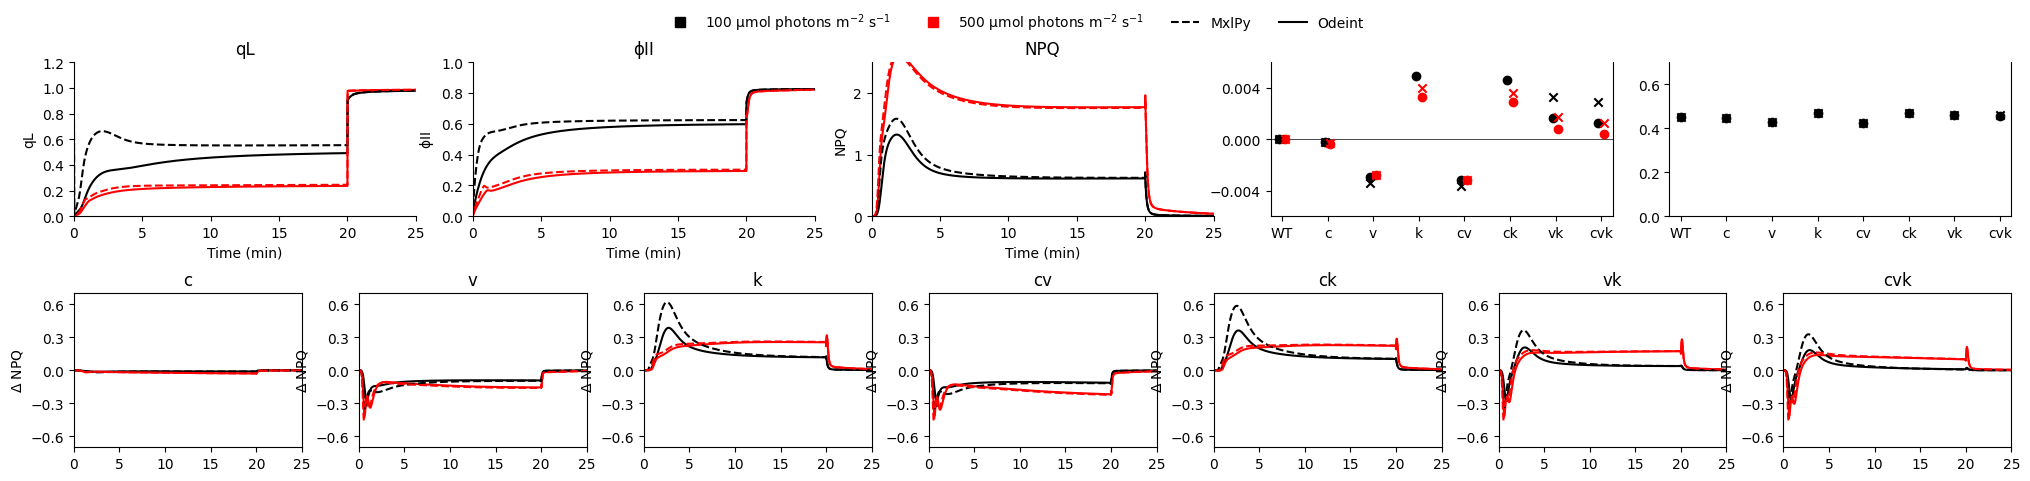

In [2]:
from li2021_odeint import create_fig3
from mxlpy_version import get_li2021
from mxlpy import Simulator, make_protocol
from matplotlib import pyplot as plt
from tqdm import tqdm
from mxlpy import Simulator, Scipy
import mxlbricks.names as n
from matplotlib.lines import Line2D

fig3, axs, res_new = create_fig3()

light_100 = make_protocol([(20 * 60, {"PAR": 100}), (5 * 60, {"PAR": 0})])
light_500 = make_protocol([(20 * 60, {"PAR": 500}), (5 * 60, {"PAR": 0})])

g_types = ["WT", "clce2", "vccn1", "kea3", "clce2vccn1", "clce2kea3", "vccn1kea3", "vccn1clce2kea3"]

res_mine = {}
for g_type in (pbar := tqdm(g_types)):
    pbar.set_description(f"Simulating '{g_type}' in mxlpy")
    m = get_li2021()
    
    if "clce2" in g_type:
        m.update_parameter("k_CLCE", 0)
    if "vccn1" in g_type:
        m.update_parameter("k_VCCN1", 0)
    if "kea3" in g_type:
        m.update_parameter("k_KEA", 0)
    
    res_mine[g_type] = {}
    
    for par, prtc in zip(["100", "500"], [light_100, light_500]):
        s = Simulator(m)
        s.simulate_protocol(prtc, time_points_per_step=1000)
        variables, fluxes = s.get_result()
        res_mine[g_type][par] = variables

for res, color in zip([res_mine["WT"]["100"], res_mine["WT"]["500"]], ["black", "red"]):
    axs["A"].plot(res.index / 60, 1-res["QA_red"], color=color, ls="dashed")
    axs["B"].plot(res.index / 60, res["Phi2"], color=color, ls="dashed")
    axs["C"].plot(res.index / 60, res["NPQ"], color=color, ls="dashed")

for ax_let, key in zip(list("FGHIJKL"), ["clce2", "vccn1", "kea3", "clce2vccn1", "clce2kea3", "vccn1kea3", "vccn1clce2kea3"]):
    ax = axs[ax_let]
    for par, color in zip(["100", "500"], ["black", "red"]):
        res = res_mine[key][par]
        ax.plot(res.index / 60, res["NPQ"] - res_mine["WT"][par]["NPQ"], color = color, ls="dashed")
        
x_coord = 0
width = 0.125
xcoords = []
for key in ["WT", "clce2", "vccn1", "kea3", "clce2vccn1", "clce2kea3", "vccn1kea3", "vccn1clce2kea3"]:
    axs["D"].scatter(x_coord - width, max(res_mine[key]["100"]["delta_pH_inVolts"]) - max(res_mine["WT"]["100"]["delta_pH_inVolts"]), color="black", marker="x")
    axs["D"].scatter(x_coord + width, max(res_mine[key]["500"]["delta_pH_inVolts"]) - max(res_mine["WT"]["500"]["delta_pH_inVolts"]), color="red", marker="x")
    
    max_Z = max(res_mine[key]["500"][n.zx()])
    max_V = max(res_mine[key]["500"][n.vx()])
    axs["E"].scatter(x_coord, max_Z / (max_Z + max_V), color="black", marker="x")
    xcoords += [x_coord]
    x_coord += 2
    
fig3.legend(
    [
        Line2D([0], [0], color="black", marker="s", markersize=7, ls="None"),
        Line2D([0], [0], color="red", marker="s", markersize=7, ls="None"),
        Line2D([0], [0], color="black", ls="dashed"),
        Line2D([0], [0], color="black", ls="solid")
    ],
    ["100 µmol photons m$^{-2}$ s$^{-1}$", "500 µmol photons m$^{-2}$ s$^{-1}$", "MxlPy", "Odeint"],
    ncols=4,
    frameon=False,
    loc="upper center",
)

plt.show()

In [1]:
from li2021_odeint import fig3_sim

params = {
    "PAR": 50,
    "k_recomb": 0.33,
    "triplet_yield": 0.45,
    "triplet_to_singletO2_yield": 1,
    "PSII_antenna_size": 0.5,
    "b6f_content": 0.433,
    "pKreg": 6.2,
    "Em7_PC": 0.37,
    "Em7_PQH2": 0.11,
    "max_b6f": 300,
    "pKPsbS": 6.2,
    "max_NPQ": 3,
    "pH_stroma": 7.8,
    "Em_Fd": -0.42,
    "k_NDH": 1000,
    "PGR_vmax": 0,
    "PSI_antenna_size": 0.5,
    "kQA": 1000,
    "Keq_QA_PQ": 200,
    "k_PC_to_P700": 5000,
    "k_Fd_to_NADP": 1000,
    "k_CBC": 60,
    "K_stroma": 0.1,
    "k_KEA": 2500000,
    "perm_K": 150,
    "lumen_protons_per_turnover": 0.000587,
    "k_VCCN1": 12,
    "k_CLCE": 800000,
    "n": 14/3,
    "ATP_synthase_max_turnover": 200,
    "buffering_capacity": 0.014,
    "Volts_per_charge": 0.047,
    "kZE": 0.004,
    "VDE_Hill": 4,
    "pKvde": 5.65,
    "VDE_max_turnover_number": 0.08,
    "k_leak": 3e7,
    # Moeity
    "QA_total": 1,
    "PQ_total": 7,
    "P700_total": 0.667,
    "PC_total": 2,
    "Fd_total": 1,
    "NA_total": 5,
    "X_total": 1
}

res_li = fig3_sim(params, 500)

res_li.keys()

t=0.0, v_CBB_NADPH=np.float64(-0.0), v_LEF=np.float64(0.0)
t=1.4035415568004532e-07, v_CBB_NADPH=np.float64(-9.727922683500635e-09), v_LEF=np.float64(0.09829703293051975)
t=1.4035415568004532e-07, v_CBB_NADPH=np.float64(-9.7279226237966e-09), v_LEF=np.float64(0.09814527109137176)
t=9.704147669170433e-08, v_CBB_NADPH=np.float64(-6.725931754179333e-09), v_LEF=np.float64(0.06796299820103514)
t=9.704147669170433e-08, v_CBB_NADPH=np.float64(-6.725931734446008e-09), v_LEF=np.float64(0.06789044998221286)
t=1.9408295338340866e-07, v_CBB_NADPH=np.float64(-1.3451858812546598e-08), v_LEF=np.float64(0.1357810545302284)
t=1.9408295338340866e-07, v_CBB_NADPH=np.float64(-1.3451858773122e-08), v_LEF=np.float64(0.1357085835066921)
t=3.881659067668173e-07, v_CBB_NADPH=np.float64(-2.6903717073570055e-08), v_LEF=np.float64(0.2712001391185027)
t=3.881659067668173e-07, v_CBB_NADPH=np.float64(-2.6903717073738115e-08), v_LEF=np.float64(0.2712002936325045)
t=5.82248860150226e-07, v_CBB_NADPH=np.float64(-4.0355

dict_keys(['QAm', 'PQH2', 'pH_lumen', 'Dy', 'K_lumen', 'PC_ox', 'P700_ox', 'Zx', 'singletO2', 'Fd_red', 'NADPH', 'Cl_lumen', 'Cl_stroma', 'time_sec', 'time_min', 'time_h', 'PsbS_H', 'NPQ', 'QA', 'Phi2', 'PQ', 'P700_red', 'PC_red', 'Fd_ox', 'NADP', 'H_lumen', 'H_stroma', 'Vx', 'pmf', 'light_per_L', 'driving_force_Cl', 'k_CBC', 'delta_pH', 'delta_pH_V', 'v_PSII_recombination', 'v_PSII_charge_separations', 'v_PQ_reduction_QA', 'v_PQH2_oxidation_QA', 'v_b6f', 'v_NDH', 'v_PGR', 'v_PSI_charge_separation', 'v_PC_oxidation_P700', 'v_LEF', 'v_Mehler', 'v_CBB_NADPH', 'v_KEA', 'v_K_channel', 'v_VCCN1', 'v_CLCE', 'v_leak', 'v_ZE', 'v_VDE'])

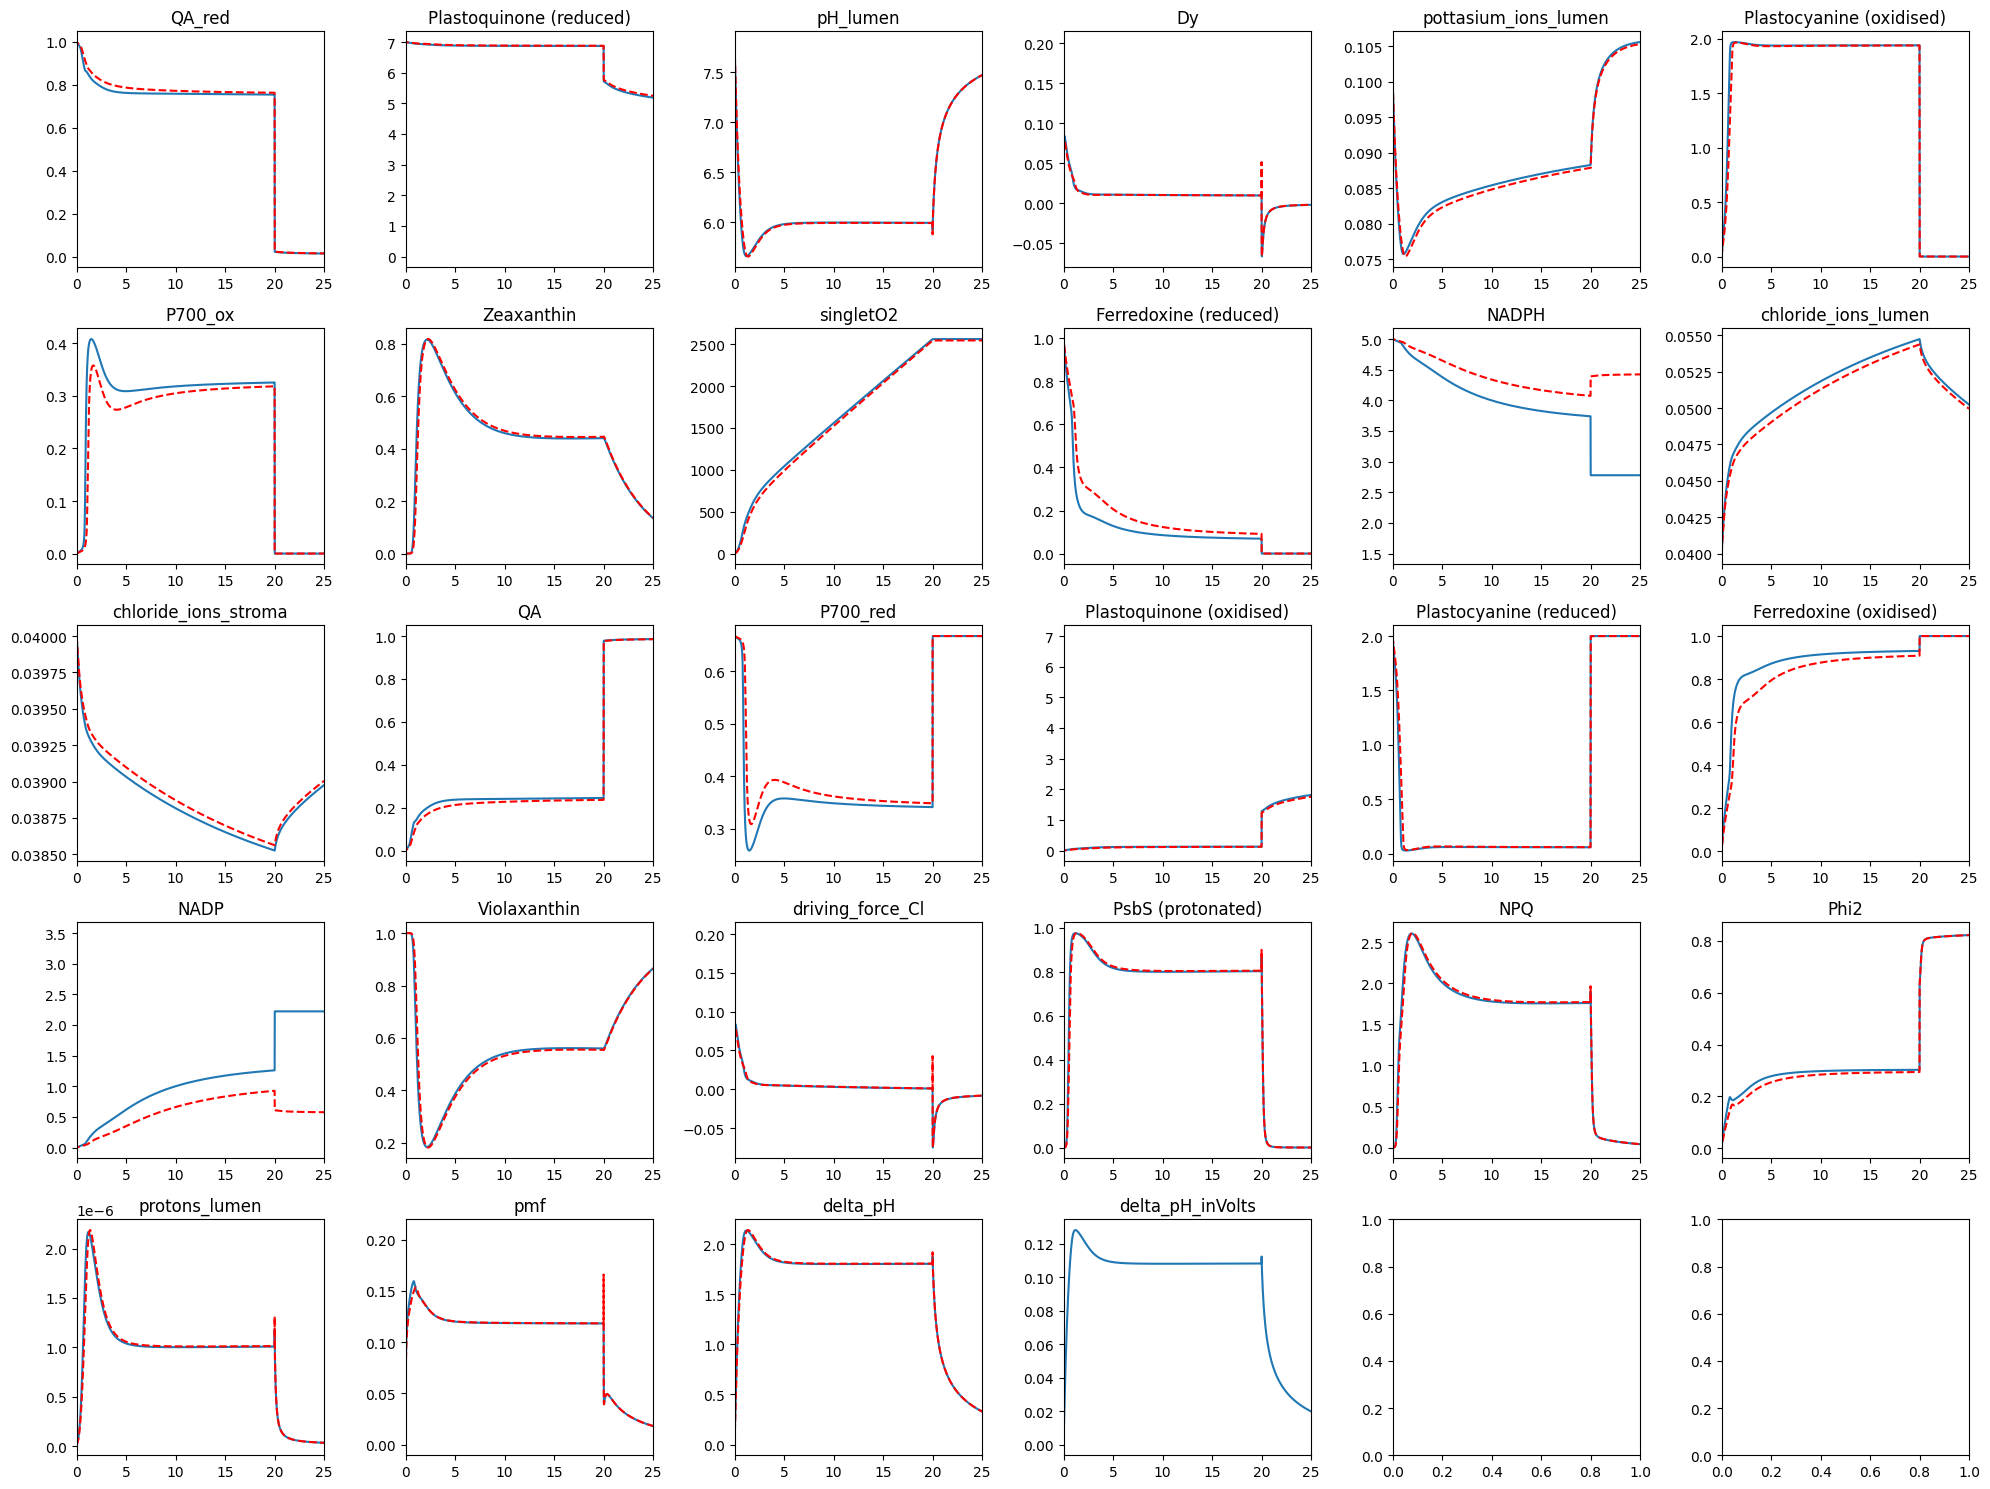

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import mxlbricks.names as n
from mxlpy_version import get_li2021
from mxlpy import Simulator, make_protocol

m = get_li2021()

light_100 = make_protocol([(20 * 60, {"PAR": 500}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_protocol(light_100, time_points_per_step=1000)
res, flux = s.get_result()

fig3, axs = plt.subplots(ncols=math.ceil(np.sqrt(len(res.columns))), nrows=math.floor(np.sqrt(len(res.columns))), figsize=(20, 15))

old = ["QAm", "PQH2", "K_lumen", "PC_ox", "Zx", "Fd_red", "Cl_lumen", "Cl_stroma", "PQ", "PC_red", "Fd_ox", "H_lumen", "H_stroma", "Vx", "PsbS_H"]
new = ["QA_red", n.pq_red(), n.pottassium("_lumen"), n.pc_ox(), n.zx(), n.fd_red(), n.chloride("_lumen"), n.chloride("_stroma"), n.pq_ox(), n.pc_red(), n.fd_ox(), n.h("_lumen"), n.h("_stroma"), n.vx(), n.psbs_pr()]

for o, n in zip(old, new):
    if o in res_li.keys():
        res_li[n] = res_li.pop(o)

for ax, var in zip(axs.flatten(), res.columns):
    ax.plot(res.index / 60, res[var])
    ax.set_title(var)
    ax.set_xlim(0, 25)
    
    if var in res_li.keys():
        ax.plot(res_li["time_min"], res_li[var], ls="dashed", color="red")
    
    
plt.tight_layout()
plt.show()

In [10]:
res.iloc[1000:1300]

,QA_red,Plastoquinone (reduced),pH_lumen,Dy,pottasium_ions_lumen,Plastocyanine (oxidised),P700_ox,Zeaxanthin,singletO2,Ferredoxine (reduced),...,NADP,Violaxanthin,driving_force_Cl,PsbS (protonated),NPQ,Phi2,protons_lumen,pmf,delta_pH,delta_pH_inVolts
1200.0,0.754544,6.873391,5.996525,0.010004,0.088284,1.941454,3.256534e-01,0.439954,2560.551584,6.909562e-02,...,1.260524,0.560046,0.000852,0.803064,1.760557,0.302605,1.008035e-06,0.118212,1.803475,0.108209
1200.3,0.021974,5.727295,5.927380,-0.018267,0.088291,0.011004,-5.879298e-14,0.440585,2560.612496,2.084859e-05,...,2.221373,0.559415,-0.027421,0.867977,1.893042,0.622604,1.182006e-06,0.094090,1.872620,0.112357
1200.6,0.021796,5.717558,5.962060,-0.046893,0.088411,0.002796,4.370443e-18,0.440883,2560.615595,1.961722e-06,...,2.222161,0.559117,-0.056041,0.838028,1.832675,0.627589,1.091290e-06,0.063383,1.837940,0.110276
1200.9,0.021750,5.715095,5.986100,-0.059116,0.088577,0.001503,-3.369805e-20,0.440998,2560.616911,6.859313e-07,...,2.222202,0.559002,-0.068253,0.814205,1.784482,0.631602,1.032523e-06,0.049718,1.813900,0.108834
1201.2,0.021723,5.713730,6.005337,-0.064155,0.088761,0.001115,-5.050318e-19,0.441001,2560.617818,4.260261e-07,...,2.222210,0.558999,-0.073280,0.793260,1.741984,0.635179,9.877871e-07,0.043525,1.794663,0.107680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288.5,0.017095,5.437114,7.106340,-0.005181,0.102676,0.000085,1.248636e-35,0.314082,2560.831164,2.180668e-07,...,2.222216,0.685918,-0.013067,0.001906,0.097802,0.813754,7.828172e-08,0.036439,0.693660,0.041620
1288.8,0.017086,5.436503,7.107486,-0.005162,0.102688,0.000084,1.267951e-35,0.313705,2560.831652,2.171741e-07,...,2.222216,0.686295,-0.013046,0.001891,0.097660,0.813775,7.807540e-08,0.036389,0.692514,0.041551
1289.1,0.017078,5.435894,7.108627,-0.005143,0.102700,0.000084,-2.285369e-37,0.313329,2560.832139,2.162875e-07,...,2.222216,0.686671,-0.013024,0.001876,0.097519,0.813796,7.787043e-08,0.036339,0.691373,0.041482
1289.4,0.017070,5.435286,7.109765,-0.005124,0.102712,0.000084,-1.906244e-35,0.312953,2560.832625,2.154068e-07,...,2.222216,0.687047,-0.013004,0.001862,0.097377,0.813817,7.766681e-08,0.036290,0.690235,0.041414


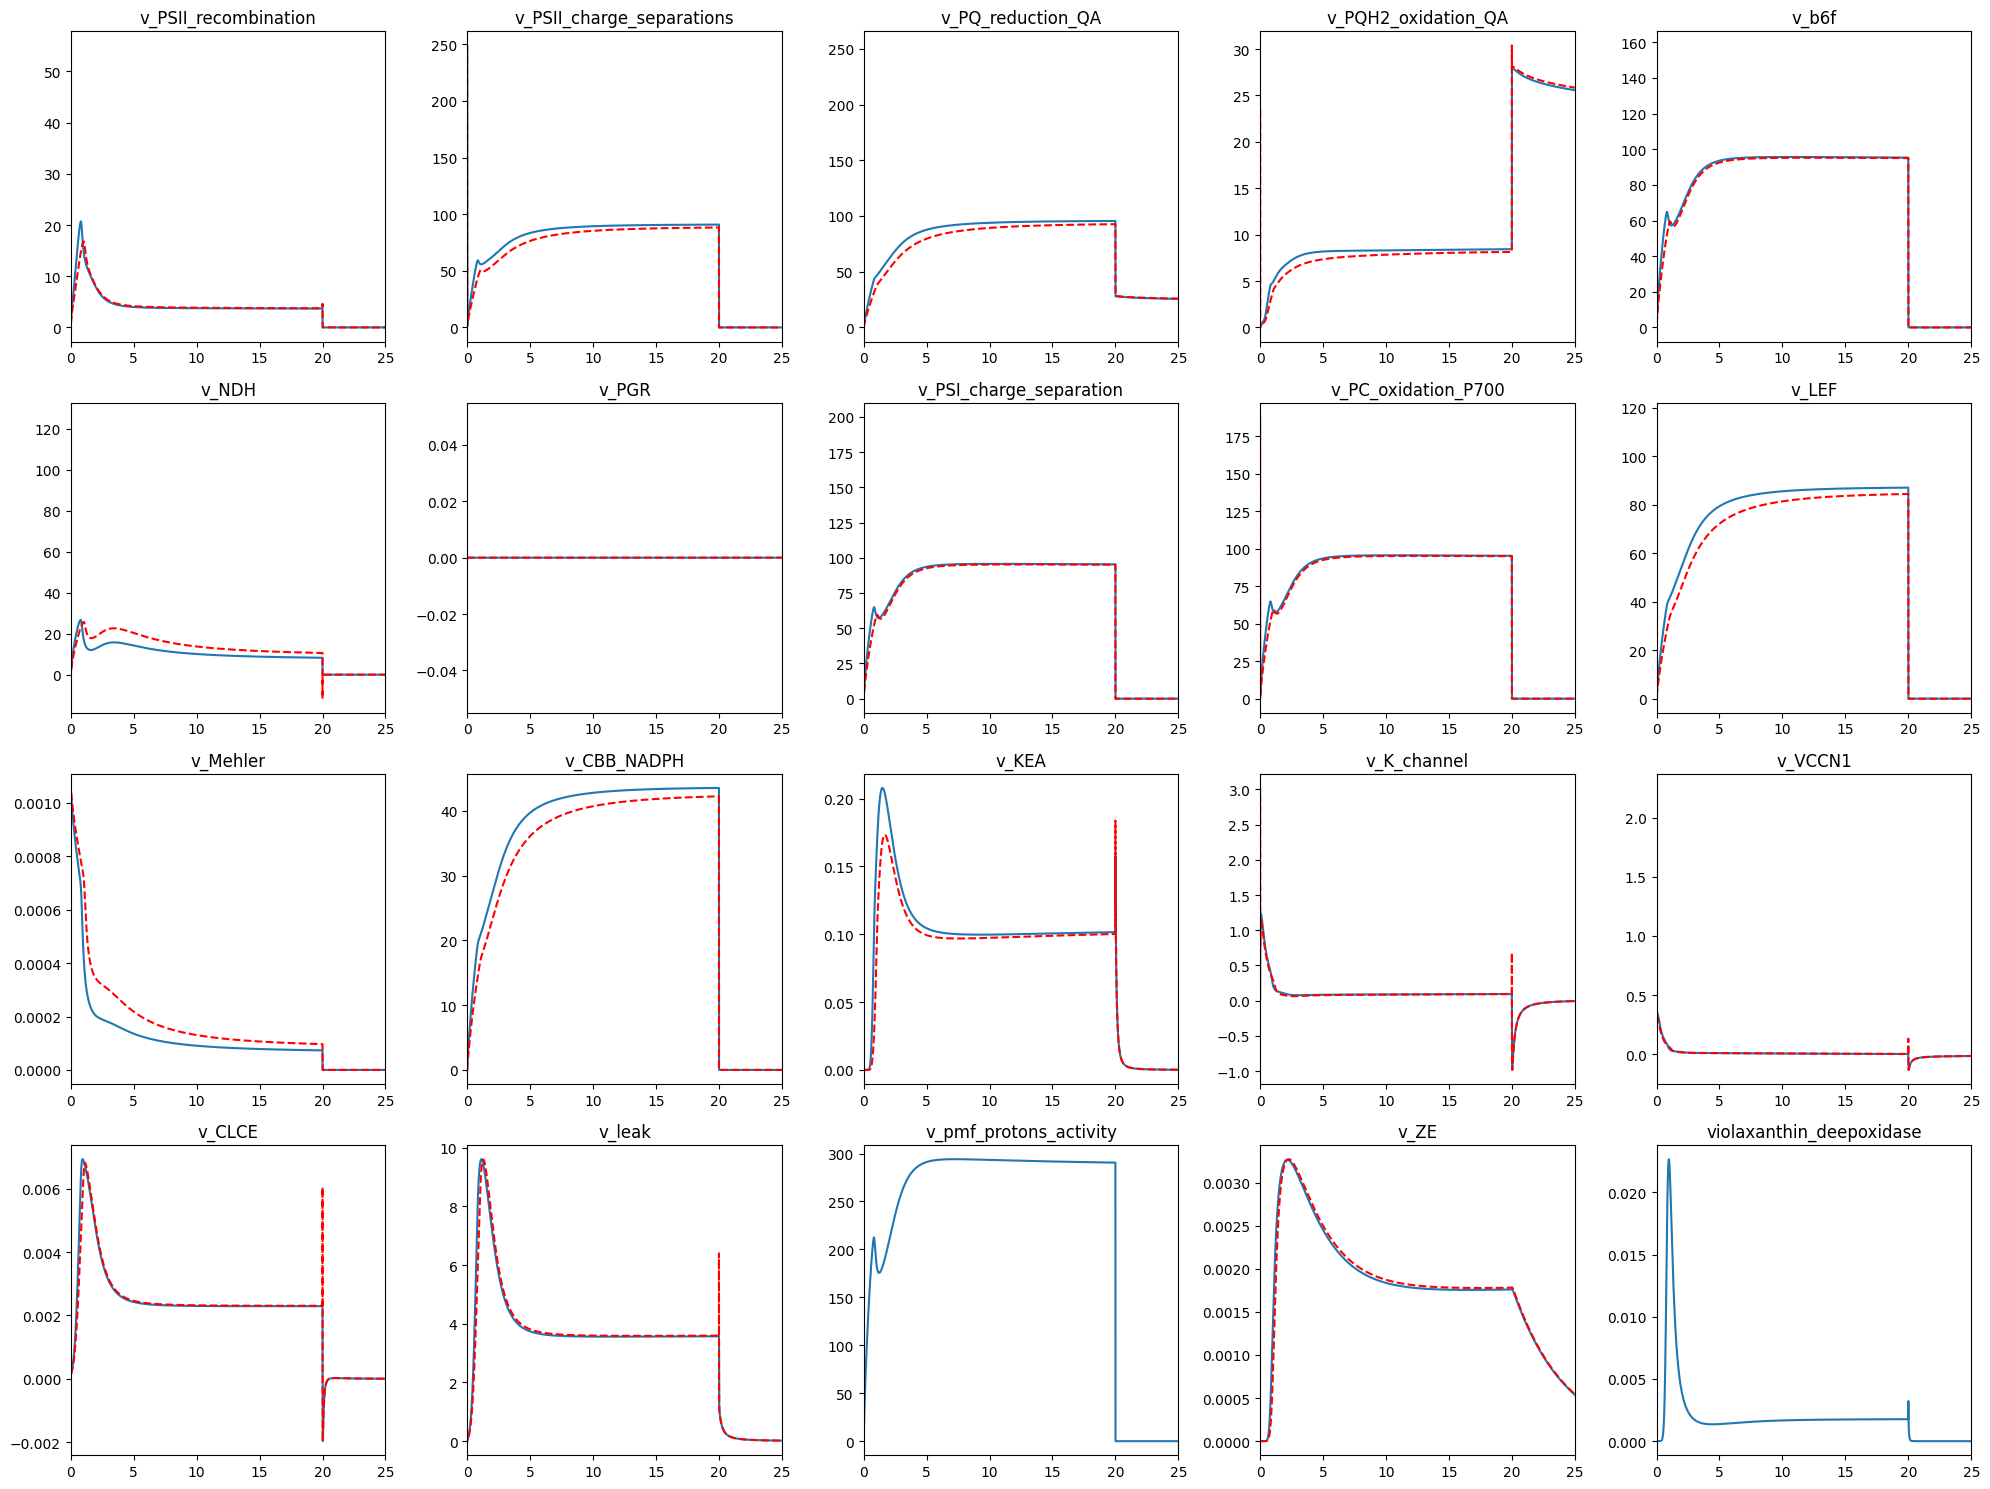

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import mxlbricks.names as n
from mxlpy_version import get_li2021
from mxlpy import Simulator, make_protocol

m = get_li2021()

light_100 = make_protocol([(20 * 60, {"PAR": 500}), (5 * 60, {"PAR": 0})])

s = Simulator(m)
s.simulate_protocol(light_100, time_points_per_step=1000)
res, flux = s.get_result()

fig3, axs = plt.subplots(ncols=math.ceil(np.sqrt(len(flux.columns))), nrows=math.floor(np.sqrt(len(flux.columns))), figsize=(20, 15))

old = []
new = []

for o, n in zip(old, new):
    if o in res_li.keys():
        res_li[n] = res_li.pop(o)

for ax, var in zip(axs.flatten(), flux.columns):
    ax.plot(flux.index / 60, flux[var])
    ax.set_title(var)
    ax.set_xlim(0, 25)
    
    if var in res_li.keys():
        ax.plot(res_li["time_min"], res_li[var], ls="dashed", color="red")
    
    
plt.tight_layout()
plt.show()

In [1]:
from li2021_odeint import fig3_sim
import pandas as pd
from mxlpy_version import get_li2021
from mxlpy import Simulator

params = {
    "PAR": 50,
    "k_recomb": 0.33,
    "triplet_yield": 0.45,
    "triplet_to_singletO2_yield": 1,
    "PSII_antenna_size": 0.5,
    "b6f_content": 0.433,
    "pKreg": 6.2,
    "Em7_PC": 0.37,
    "Em7_PQH2": 0.11,
    "max_b6f": 300,
    "pKPsbS": 6.2,
    "max_NPQ": 3,
    "pH_stroma": 7.8,
    "Em_Fd": -0.42,
    "k_NDH": 1000,
    "PGR_vmax": 0,
    "PSI_antenna_size": 0.5,
    "kQA": 1000,
    "Keq_QA_PQ": 200,
    "k_PC_to_P700": 5000,
    "k_Fd_to_NADP": 1000,
    "k_CBC": 60,
    "K_stroma": 0.1,
    "k_KEA": 2500000,
    "perm_K": 150,
    "lumen_protons_per_turnover": 0.000587,
    "k_VCCN1": 12,
    "k_CLCE": 800000,
    "n": 14/3,
    "ATP_synthase_max_turnover": 200,
    "buffering_capacity": 0.014,
    "Volts_per_charge": 0.047,
    "kZE": 0.004,
    "VDE_Hill": 4,
    "pKvde": 5.65,
    "VDE_max_turnover_number": 0.08,
    "k_leak": 3e7,
    # Moeity
    "QA_total": 1,
    "PQ_total": 7,
    "P700_total": 0.667,
    "PC_total": 2,
    "Fd_total": 1,
    "NA_total": 5,
    "X_total": 1
}

res = fig3_sim(params=params, par=100)

first_vars_odeint = {}
for key in res.keys():
    try:
        first_vars_odeint[key] = res[key][0]
    except:
        continue

m = get_li2021()

m.update_parameter("PAR", 100)

first_flux_mxlpy = m.get_fluxes()

s = Simulator(m)

s.simulate(1)

variables, fluxes = s.get_result()
first_vars_mxlpy = {}
for key in variables.keys():
    first_vars_mxlpy[key] = variables[key][0]

;

''

In [15]:
first_flux_mxlpy

v_PSII_recombination         0.000000e+00
v_PSII_charge_separations    4.979572e+01
v_PQ_reduction_QA            0.000000e+00
v_PQH2_oxidation_QA          0.000000e+00
v_b6f                       -1.864368e-03
v_NDH                        0.000000e+00
v_PGR                        0.000000e+00
v_PSI_charge_separation      4.002000e+01
v_PC_oxidation_P700          0.000000e+00
v_LEF                        0.000000e+00
v_Mehler                     0.000000e+00
v_CBB_NADPH                 -0.000000e+00
v_KEA                        0.000000e+00
v_K_channel                  0.000000e+00
v_VCCN1                      0.000000e+00
v_CLCE                       0.000000e+00
v_leak                       0.000000e+00
v_pmf_protons_activity       9.943902e-02
v_ZE                         0.000000e+00
violaxanthin_deepoxidase     2.009509e-10
dtype: float64

In [13]:
first_vars_odeint

{'QAm': np.float64(0.0),
 'PQH2': np.float64(0.0),
 'pH_lumen': np.float64(7.8),
 'Dy': np.float64(0.0),
 'K_lumen': np.float64(0.1),
 'PC_ox': np.float64(0.0),
 'P700_ox': np.float64(0.0),
 'Zx': np.float64(0.0),
 'singletO2': np.float64(0.0),
 'Fd_red': np.float64(0.0),
 'NADPH': np.float64(1.5),
 'Cl_lumen': np.float64(0.04),
 'Cl_stroma': np.float64(0.04),
 'time_sec': np.float64(0.0),
 'time_min': np.float64(0.0),
 'time_h': np.float64(0.0),
 'PsbS_H': np.float64(1.584868073994903e-05),
 'NPQ': np.float64(2.3773021109923547e-05),
 'QA': np.float64(1.0),
 'Phi2': np.float64(0.8299286173621531),
 'PQ': np.float64(7.0),
 'P700_red': np.float64(0.667),
 'PC_red': np.float64(2.0),
 'Fd_ox': np.float64(1.0),
 'NADP': np.float64(3.5),
 'H_lumen': np.float64(1.5848931924611143e-08),
 'Vx': np.float64(1.0),
 'pmf': np.float64(0.0),
 'driving_force_Cl': np.float64(0.0),
 'delta_pH': np.float64(0.0),
 'delta_pH_V': np.float64(0.0),
 'v_PSII_recombination': np.float64(0.0),
 'v_PSII_charge_se

In [14]:
first_vars_mxlpy

{'QA_red': np.float64(0.0),
 'Plastoquinone (reduced)': np.float64(0.0),
 'pH_lumen': np.float64(7.8),
 'Dy': np.float64(0.0),
 'pottasium_ions_lumen': np.float64(0.1),
 'Plastocyanine (oxidised)': np.float64(0.0),
 'P700_ox': np.float64(0.0),
 'Zeaxanthin': np.float64(0.0),
 'singletO2': np.float64(0.0),
 'Ferredoxine (reduced)': np.float64(0.0),
 'NADPH': np.float64(1.5),
 'chloride_ions_lumen': np.float64(0.04),
 'chloride_ions_stroma': np.float64(0.04),
 'QA': np.float64(1.0),
 'P700_red': np.float64(0.667),
 'Plastoquinone (oxidised)': np.float64(7.0),
 'Plastocyanine (reduced)': np.float64(2.0),
 'Ferredoxine (oxidised)': np.float64(1.0),
 'NADP': np.float64(3.5),
 'Violaxanthin': np.float64(1.0),
 'driving_force_Cl': np.float64(0.0),
 'PsbS (protonated)': np.float64(1.584868073994903e-05),
 'NPQ': np.float64(2.3773021109923547e-05),
 'Phi2': np.float64(0.8299286173621531),
 'protons_lumen': np.float64(1.5848931924611143e-08),
 'pmf': np.float64(0.0)}

In [18]:
get_li2021().get_stoichiometries()

,v_PSII_recombination,v_PSII_charge_separations,v_PQ_reduction_QA,v_PQH2_oxidation_QA,v_b6f,v_NDH,v_KEA,v_CLCE,v_leak,v_pmf_protons_activity,v_K_channel,v_VCCN1,v_PGR,v_PC_oxidation_P700,v_PSI_charge_separation,v_LEF,v_Mehler,v_CBB_NADPH,v_ZE,violaxanthin_deepoxidase
singletO2,0.450000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QA_red,-1.000000,1.000000,-1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pH_lumen,0.041929,-0.041929,0.0,0.0,-0.083857,-0.083857,0.041929,0.041929,0.041929,0.041929,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dy,-0.047000,0.047000,0.0,0.0,0.047000,0.094000,0.000000,-0.141000,-0.047000,-0.047000,-0.047000,-0.047000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Plastoquinone (reduced),0.000000,0.000000,0.5,-0.5,-0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Plastocyanine (oxidised),0.000000,0.000000,0.0,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ferredoxine (reduced),0.000000,0.000000,0.0,0.0,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,0.0,1.0,-1.0,-1.0,0.0,0.0,0.0
P700_ox,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
NADPH,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.5,0.0,-1.0,0.0,0.0
pottasium_ions_lumen,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000587,0.000000,0.000000,0.000000,-0.000587,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
import pandas as pd

# species list
species = [
    "singletO2", "QAm", "PQH2", "P700_ox", "PC_ox", "Fd_red", "NADPH",
    "K_lumen", "Cl_lumen", "Cl_stroma", "pH_lumen", "Dy", "Zx"
]

# flux list
fluxes = [
    "v_PSII_recombination", "v_PSII_charge_separations", "v_PQH2_oxidation_QA",
    "v_PQ_reduction_QA", "v_NDH", "v_PGR", "v_b6f", "v_PSI_charge_separation",
    "v_PC_oxidiation_P700", "v_LEF", "v_Mehler", "v_CBB_NADPH", "v_KEA",
    "v_K_channel", "v_VCCN1", "v_CLCE", "v_pmf_protons_activity", "v_leak",
    "v_VDE", "v_ZE"
]

triplet_yield = 0.45
triplet_to_singletO2_yield = 1
lumen_protons_per_turnover = 0.000587
buffering_capacity = 0.014
Volts_per_charge = 0.047

# initialize stoichiometric matrix with zeros
S = pd.DataFrame(0.0, index=species, columns=fluxes)

# fill in coefficients (taken directly from your ODEs)

S.loc["singletO2", "v_PSII_recombination"] = (triplet_yield * triplet_to_singletO2_yield)

S.loc["QAm", "v_PSII_charge_separations"] =  1
S.loc["QAm", "v_PQH2_oxidation_QA"] =  1
S.loc["QAm", "v_PQ_reduction_QA"]   = -1
S.loc["QAm", "v_PSII_recombination"] = -1

S.loc["PQH2", "v_PQ_reduction_QA"]      =  0.5
S.loc["PQH2", "v_NDH"]                  =  0.5
S.loc["PQH2", "v_PGR"]                  =  0.5
S.loc["PQH2", "v_b6f"]                  = -0.5
S.loc["PQH2", "v_PQH2_oxidation_QA"]    = -0.5

S.loc["P700_ox", "v_PSI_charge_separation"] =  1
S.loc["P700_ox", "v_PC_oxidiation_P700"]   = -1

S.loc["PC_ox", "v_PC_oxidiation_P700"] =  1
S.loc["PC_ox", "v_b6f"]                = -1

S.loc["Fd_red", "v_PSI_charge_separation"] =  1
S.loc["Fd_red", "v_LEF"]   = -1
S.loc["Fd_red", "v_NDH"]   = -1
S.loc["Fd_red", "v_PGR"]   = -1
S.loc["Fd_red", "v_Mehler"]= -1

S.loc["NADPH", "v_LEF"]       =  0.5
S.loc["NADPH", "v_CBB_NADPH"] = -1

S.loc["K_lumen", "v_KEA"]       =  1 * lumen_protons_per_turnover
S.loc["K_lumen", "v_K_channel"] = -1 * lumen_protons_per_turnover

S.loc["Cl_lumen", "v_VCCN1"] =  1 * lumen_protons_per_turnover
S.loc["Cl_lumen", "v_CLCE"]  =  2 * lumen_protons_per_turnover

S.loc["Cl_stroma", "v_VCCN1"] = -0.1 * lumen_protons_per_turnover
S.loc["Cl_stroma", "v_CLCE"]  = -0.2 * lumen_protons_per_turnover

# for pH_lumen and Dy you have mixed coefficients; they’re linear combos.
# You can store them directly too:
S.loc["pH_lumen", "v_PSII_charge_separations"] = -lumen_protons_per_turnover/buffering_capacity
S.loc["pH_lumen", "v_PSII_recombination"]      =  lumen_protons_per_turnover/buffering_capacity
S.loc["pH_lumen", "v_b6f"]                     = -2*lumen_protons_per_turnover/buffering_capacity
S.loc["pH_lumen", "v_NDH"]                     = -2*lumen_protons_per_turnover/buffering_capacity
S.loc["pH_lumen", "v_pmf_protons_activity"]    =  lumen_protons_per_turnover/buffering_capacity
S.loc["pH_lumen", "v_leak"]                    =  lumen_protons_per_turnover/buffering_capacity
S.loc["pH_lumen", "v_KEA"]                     =  lumen_protons_per_turnover/buffering_capacity
S.loc["pH_lumen", "v_CLCE"]                    =  lumen_protons_per_turnover/buffering_capacity

S.loc["Dy", "v_PSII_charge_separations"] =  1*Volts_per_charge
S.loc["Dy", "v_PSII_recombination"]      = -1*Volts_per_charge
S.loc["Dy", "v_PSI_charge_separation"]   =  1*Volts_per_charge
S.loc["Dy", "v_b6f"]                     =  1*Volts_per_charge
S.loc["Dy", "v_NDH"]                     =  2*Volts_per_charge
S.loc["Dy", "v_K_channel"]               = -1*Volts_per_charge
S.loc["Dy", "v_pmf_protons_activity"]    = -1*Volts_per_charge
S.loc["Dy", "v_leak"]                    = -1*Volts_per_charge
S.loc["Dy", "v_VCCN1"]                   = -1*Volts_per_charge
S.loc["Dy", "v_CLCE"]                    = -3*Volts_per_charge

S.loc["Zx", "v_VDE"] =  1
S.loc["Zx", "v_ZE"]  = -1

S.index

Index(['singletO2', 'QAm', 'PQH2', 'P700_ox', 'PC_ox', 'Fd_red', 'NADPH',
       'K_lumen', 'Cl_lumen', 'Cl_stroma', 'pH_lumen', 'Dy', 'Zx'],
      dtype='object')

In [3]:
from mxlpy_version import get_li2021

odeint_comp = "NADPH"
mxlpy_comp = "NADPH"

single_stoic = S.loc[odeint_comp]
print(single_stoic[single_stoic != 0])

single_stoic = get_li2021().get_stoichiometries().loc[mxlpy_comp]
print(single_stoic[single_stoic != 0])

v_LEF          0.5
v_CBB_NADPH   -1.0
Name: NADPH, dtype: float64
v_LEF          0.5
v_CBB_NADPH   -1.0
Name: NADPH, dtype: float64


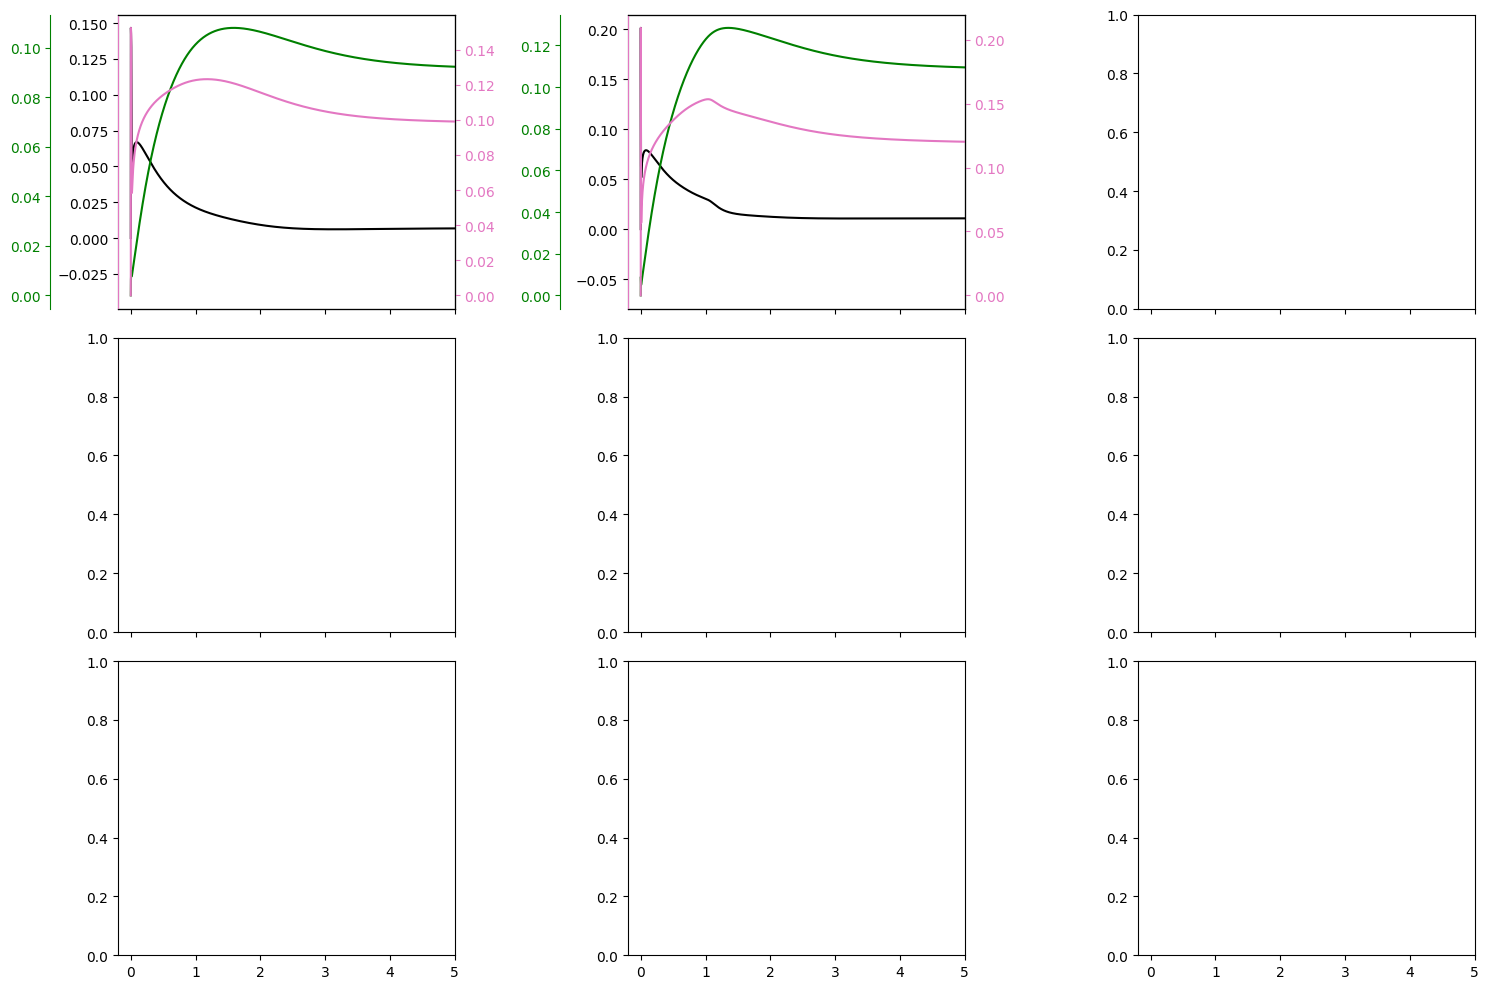

In [ ]:
fig4, axs = plt.subplot_mosaic([
    ["A", "B", "C"],
    ["D", "E", "F"],
    ["G", "H", "I"]
], figsize=(15, 10), sharex=True)

for ax, par in zip(["A", "B"], ["100", "500"]):
    axs[ax].plot(res_new["WT"][par]["time_min"], res_new["WT"][par]["Dy"], color="black")
    
    ph_axis = axs[ax].twinx()
    ph_axis.spines["left"].set_position(("axes", -0.2))
    ph_axis.spines["left"].set_visible(True)
    ph_axis.spines["left"].set_color("green")
    ph_axis.yaxis.set_label_position('left')
    ph_axis.yaxis.set_ticks_position('left')
    ph_axis.tick_params(axis='y', colors='green')
    ph_axis.plot(res_new["WT"][par]["time_min"], res_new["WT"][par]["delta_pH_V"], color="green")
    
    pmf_axis = axs[ax].twinx()
    pmf_axis.spines["left"].set_color("tab:pink")
    pmf_axis.tick_params(axis='y', colors='tab:pink')
    pmf_axis.plot(res_new["WT"][par]["time_min"], res_new["WT"][par]["pmf"], color="tab:pink")



for ax in ["A", "B"]:
    axs[ax].set_xlim(-0.2, 5)

plt.tight_layout()

plt.show()

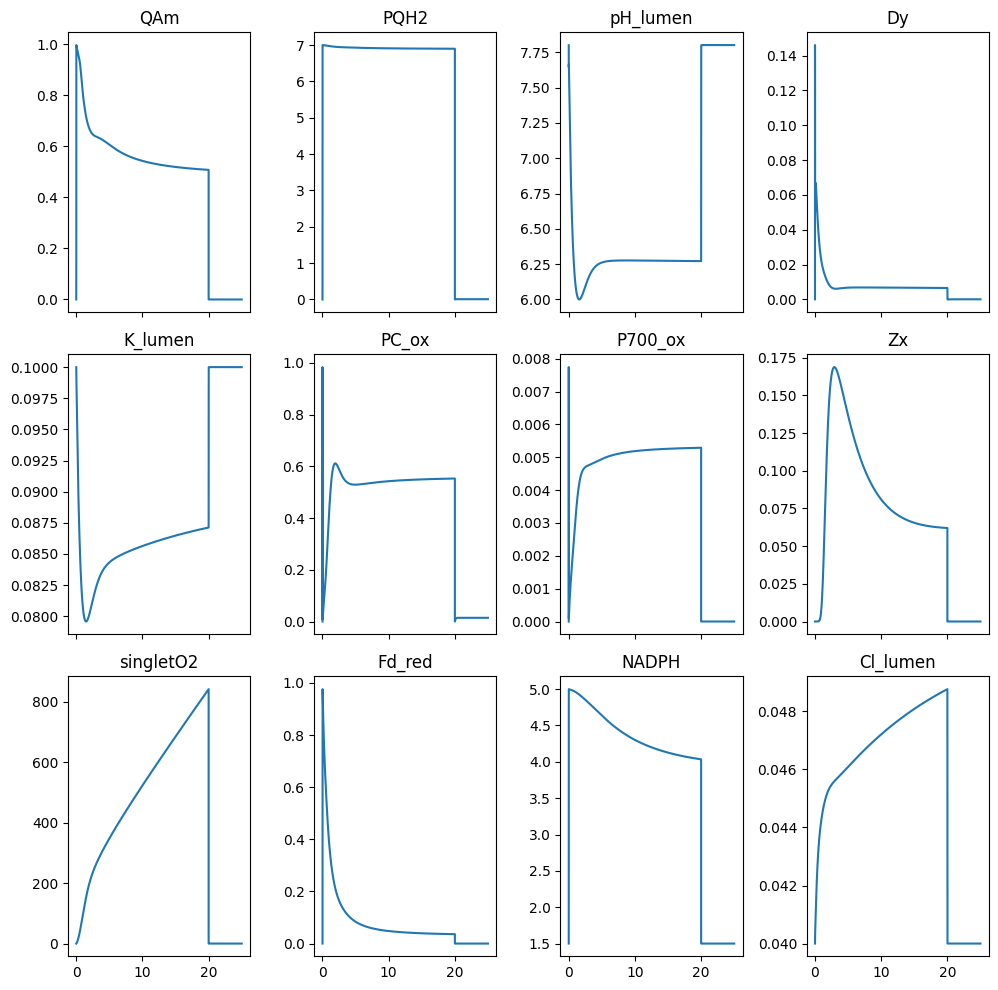

In [ ]:
fig, axs = plt.subplots(nrows=math.floor(math.sqrt(len(output.keys()))), ncols=math.ceil(math.sqrt(len(output.keys()))), figsize=(10, 10), sharex=True)

for ax, label in zip(axs.flatten(), output.keys()):
    ax.plot(time / 60, output[label])
    ax.set_title(label)
    
plt.tight_layout()

(6.2, 1, 1000, 300.0, 0.000587, np.float64(0.0), 200.0, 0.5, 0.047, 150, 4.666666666666667, 0.11, 0.37, -0.42, 0.5, 0.014, 0.08, 5.65, 4, 0.004, 6.2, 3, 0.33, 5000, 0.45, 1, 0.25, 1000, 17.142857142857142, 2500000, 12, 800000, 1000.0) (6.2, 1, 1000, 300.0, 0.000587, np.float64(2.0202020202020203), 200.0, 0.5, 0.047, 150, 4.666666666666667, 0.11, 0.37, -0.42, 0.5, 0.014, 0.08, 5.65, 4, 0.004, 6.2, 3, 0.33, 5000, 0.45, 1, 0.25, 1000, 17.142857142857142, 2500000, 12, 800000, 1000.0)
Change Constants


Changed Parameter,Old Value,New Value
k_CBC,60,17.142857142857142


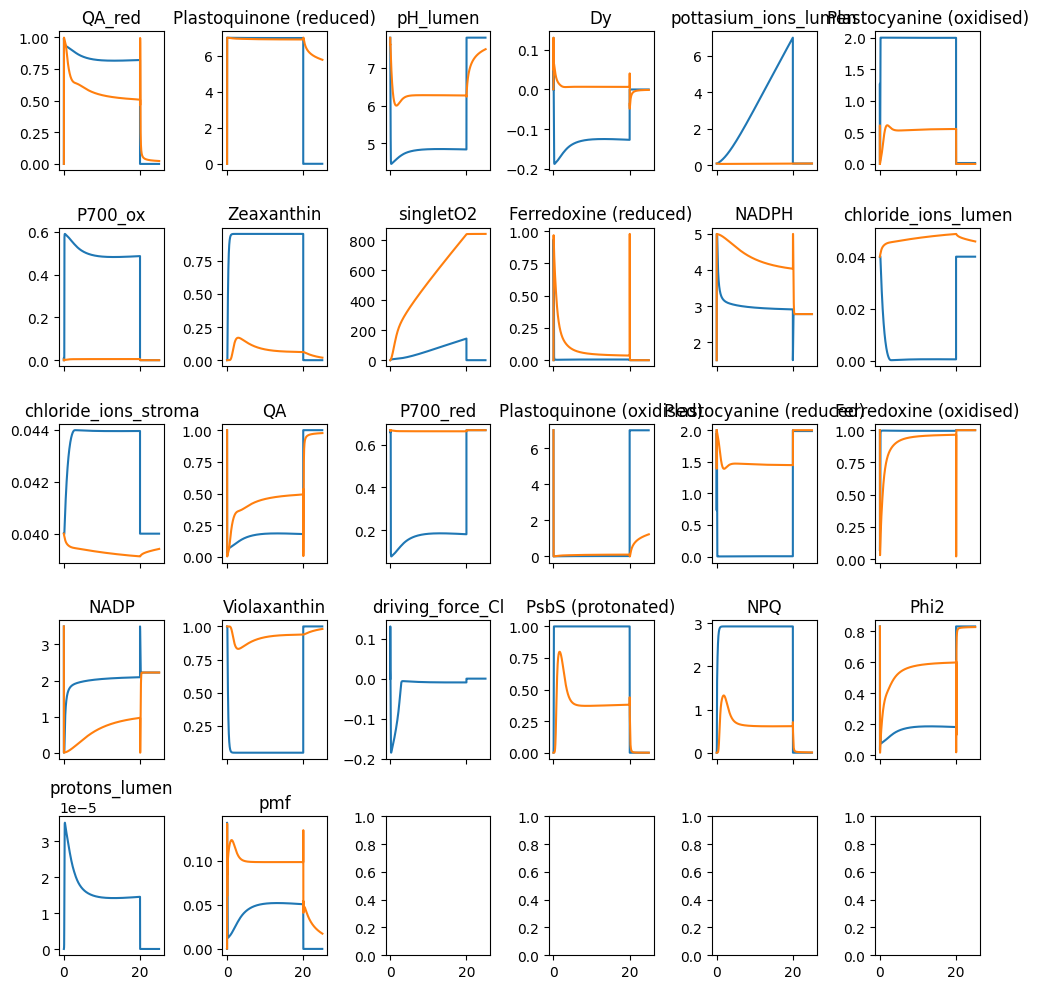

In [ ]:
import math
from li2021_odeint import fig3_sim, change_params
from mxlpy_version import get_li2021

res_new = {}
    for g_type in (pbar := tqdm(["WT"])):
        pbar.set_description(f"Simulating '{g_type}'")
        if g_type != "WT":
            new_pars = change_params(params.copy(), g_type)
        else:
            new_pars = params.copy()
        res_new[g_type] = {
            "100": fig3_sim(new_pars, 100),
            "500": fig3_sim(new_pars, 500)
        }

m = get_li2021()

(res_100, flux_100), res_500 = simulate_fig3(m, m)

fig, axs = plt.subplots(nrows=math.floor(math.sqrt(len(res_100.columns))), ncols=math.ceil(math.sqrt(len(res_100.columns))), figsize=(10, 10), sharex=True)

new = [
    "QA_red",
    n.pq_red(),
    n.pq_ox(),
    n.pottassium("_lumen"),
    n.pc_ox(),
    n.zx(),
    n.fd_red(),
    n.chloride("_lumen"),
    n.chloride("_stroma"),
    n.pc_red(),
    n.fd_ox(),
    n.vx(),
    n.psbs_pr(),
]

old = [
    "QAm",
    "PQH2",
    "PQ",
    "K_lumen",
    "PC_ox",
    "Zx",
    "Fd_red",
    "Cl_lumen",
    "Cl_stroma",
    "PC_red",
    "Fd_ox",
    "V",
    "PsbS_H",
]

for new_key, old_key in zip(new, old):
    if res_dict_new["WT"]["100"].get(new_key) is None:
        res_dict_new["WT"]["100"][new_key] = res_dict_new["WT"]["100"].pop(old_key)

for ax, key in zip(axs.flatten(), res_100.columns):
    ax.plot(res_100.index / 60, res_100[key].values, label="own version")
    if res_dict_new["WT"]["100"].get(key) is not None:
        ax.plot(res_dict_new["WT"]["100"]["time_axis_min"], res_dict_new["WT"]["100"][key], label="odeint")
        
    ax.set_title(key)
    
plt.tight_layout()
plt.show()

dict_keys(['pH_lumen', 'Dy', 'P700_ox', 'singletO2', 'NADPH', 'time_axis', 'time_axis_min', 'time_axis_h', 'NPQ', 'QA', 'Phi2', 'P700_red', 'NADP', 'H_lumen', 'H_stroma', 'pmf', 'v_PSII_recombination', 'v_PQ_reduction_QA', 'v_PQH2_oxidation_QA', 'v_b6f', 'v_NDH', 'v_PGR', 'v_PC_oxidiation_P700', 'v_LEF', 'v_Mehler', 'v_KEA', 'v_K_channel', 'v_VCCN1', 'v_CLCE', 'v_leak', 'v_ZE', 'v_VDE', 'qL', 'QA_red', 'Plastoquinone (reduced)', 'Plastoquinone (oxidised)', 'pottasium_ions_lumen', 'Plastocyanine (oxidised)', 'Zeaxanthin', 'Ferredoxine (reduced)', 'chloride_ions_lumen', 'chloride_ions_stroma', 'Plastocyanine (reduced)', 'Ferredoxine (oxidised)', 'Violaxanthin', 'PsbS (protonated)'])


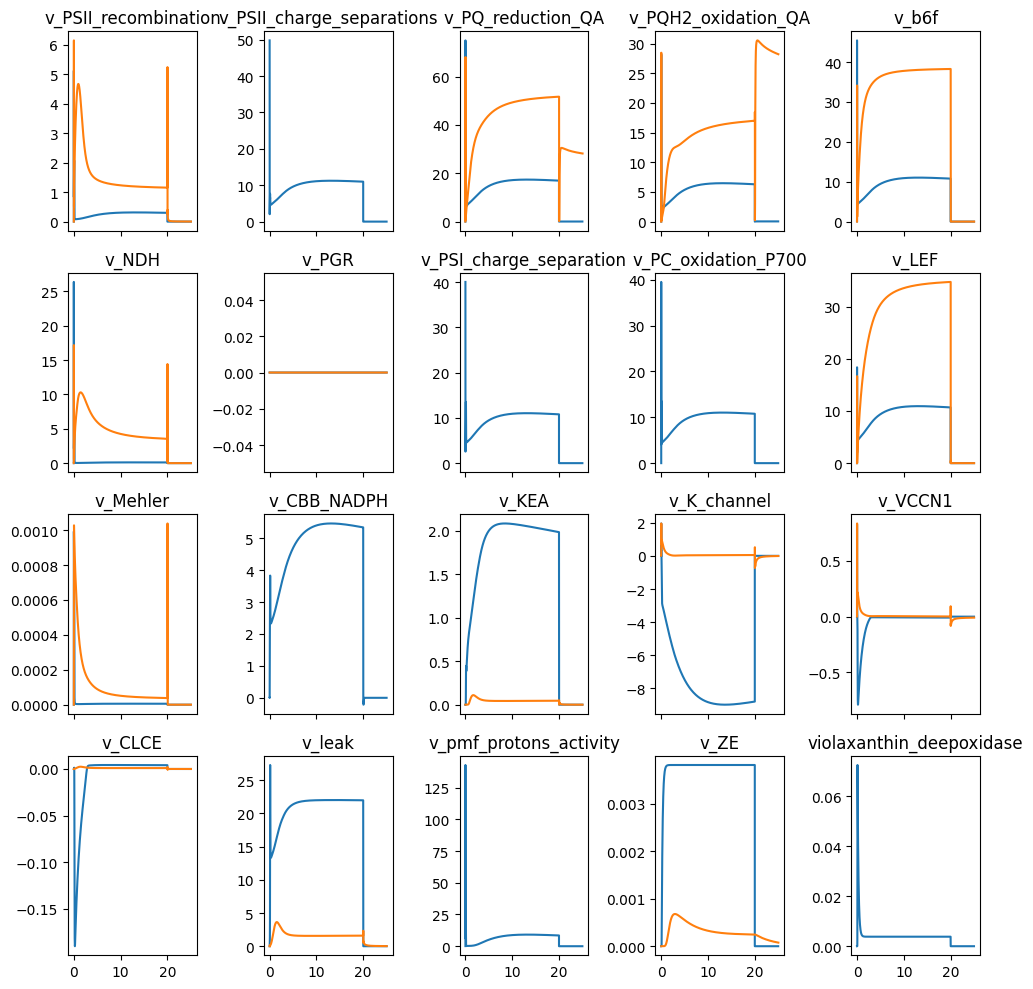

In [ ]:
fig, axs = plt.subplots(nrows=math.floor(math.sqrt(len(flux_100.columns))), ncols=math.ceil(math.sqrt(len(flux_100.columns))), figsize=(10, 10), sharex=True)
print(res_dict_new["WT"]["100"].keys())
for ax, key in zip(axs.flatten(), flux_100.columns):
    ax.plot(flux_100.index / 60, flux_100[key].values, label="own version")
    if res_dict_new["WT"]["100"].get(key) is not None:
        ax.plot(res_dict_new["WT"]["100"]["time_axis_min"], res_dict_new["WT"]["100"][key], label="odeint")
        
    ax.set_title(key)
    
plt.tight_layout()
plt.show()

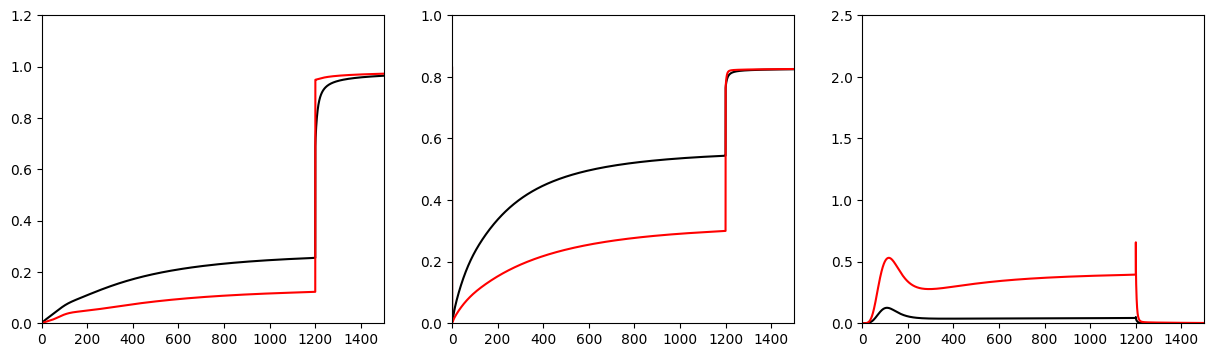

In [ ]:
m = get_delta_psi_Li()

m.remove_parameter("kCBB")

def _kCBB(PAR):
    return 60 * (PAR/(PAR+250))

m.add_derived(
    name="kCBB",
    fn=_kCBB,
    args=["PAR"]
)

fig3_mine, axs = create_fig3(m, m)

plt.show()

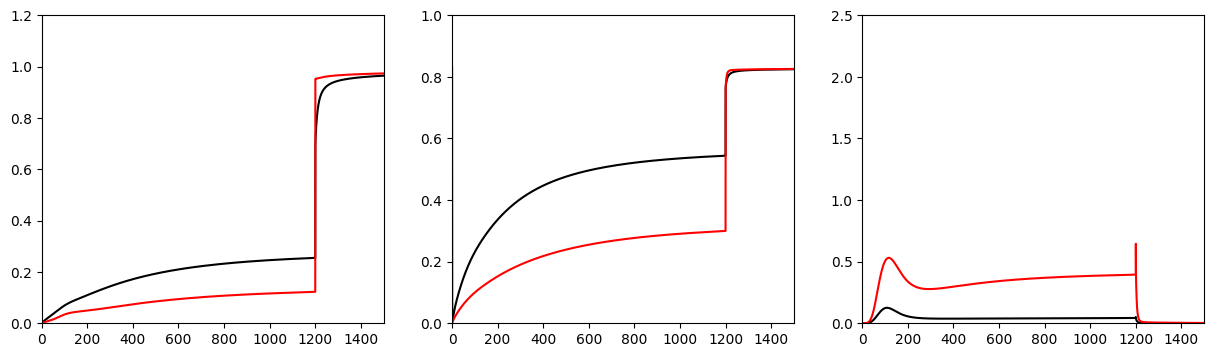

In [ ]:
def _kCBB(PAR):
    return 60 * (PAR/(PAR+250))

m_100 = get_delta_psi_Li()
m_100.update_parameter("kCBB", _kCBB(100))

m_500 = get_delta_psi_Li()
m_500.update_parameter("kCBB", _kCBB(500))

fig3_mine, axs = create_fig3(m_100, m_500)

plt.show()

KeyError: 'QAm'

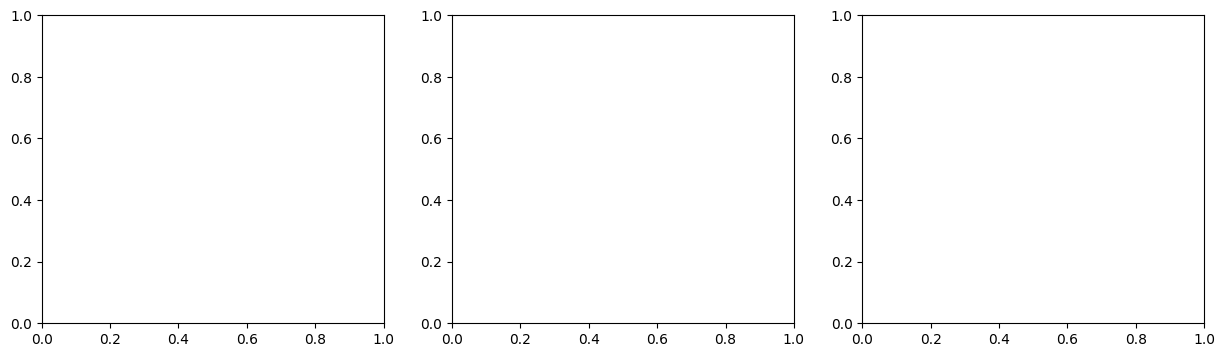

In [ ]:
fig3, axs = plt.subplots(ncols=3, figsize=(15, 4))

for res, color in zip([res_100, res_500], ["black", "red"]):
    axs[0].plot(res.index, 1-res["QAm"], color=color)
    axs[1].plot(res.index, res["PhiPSII"], color=color)
    axs[2].plot(res.index, res["NPQ"], color=color)

for ax in axs:
    ax.set_xlim(0, 25)

axs[0].set_ylim(0, 1.2)
axs[1].set_ylim(0, 1.0)
axs[2].set_ylim(0, 2.5)

plt.tight_layout()

In [ ]:
#### b6f becomes negative ####
#### PSI and PSII charge separation extremely high, compared other reaction rates ####
###maybe rewrite pH as variable### so its closer to the model 

In [ ]:
s=Simulator(get_delta_psi_Li())
s.update_parameter("light_per_L", 100)
s.simulate(20*60)
s.update_parameter("light_per_L", 0)
s.simulate(1500)

fr1, f1 = s.get_result()

s=Simulator(get_delta_psi_Li())
s.update_parameter("light_per_L", 500)
s.simulate(20*60)
s.update_parameter("light_per_L", 0)
s.simulate(1500)

fr, f = s.get_result()

In [ ]:
# fr1=s.get_full_results()
# f1= s.get_fluxes()



In [ ]:
# plt.plot(fr["QA"], color="red", label="light=500umol")
plt.plot(fr1["QA"], color="black", label="light=100umol")

In [ ]:
plt.plot(1-fr["QAm"], color="red", label="light=500umol")
plt.plot(1-fr1["QAm"], color="black", label="light=100umol")
plt.ylabel("qL")
plt.xlabel("time[s]")
plt.legend()

In [ ]:
plt.plot(fr["PhiPSII"], color="red", label="light=500umol")
plt.plot(fr1["PhiPSII"], color="black", label="light=100umol")
plt.ylabel("$Phi$PSII")
plt.xlabel("time[s]")
plt.legend()

In [ ]:
plt.plot(fr["NPQ"], color="red", label="light=500umol")
plt.plot(fr1["NPQ"], color="black", label="light=100umol")
plt.ylabel("NPQ")
plt.xlabel("time[s]")
plt.legend()

In [ ]:
plt.plot(f["vVDE"])

In [ ]:
plt.plot(fr["zea"], color="red", label="f$_{zx}$")
plt.plot(fr["vea"], color="black", label="f$_{vx}$")
plt.ylabel("fraction of viol- and zeaxanthin")
plt.xlabel("time[s]")
plt.title("500 umol")
plt.legend()

In [ ]:
plt.plot(fr["PsbS_protonation"], color="red", label="protonated PsbS")
plt.xlabel("time[s]")
plt.title("500 umol")
plt.legend()

In [ ]:
plt.plot(fr["pHlumen"])

In [ ]:
plt.plot(fr["Cl_lumen"])
plt.plot

In [ ]:
plt.plot(fr["Hlumen"])
plt.plot(fr["vATPsynthase"])

In [ ]:
#s.get_fluxes()["vATPsynthase"]
plt.plot(s.get_fluxes()["vKEA3"])
#plt.plot(s.get_fluxes()["vClCe"])
#plt.plot(s.get_fluxes()["vVCCN1"])
#plt.plot(s.get_full_results()["reg_KEA3"])
#plt.plot(s.get_full_results()["vVoltageK_channel"])

In [ ]:
plt.plot(s.get_fluxes()["vClCe"])
#plt.plot(s.get_fluxes()["vVCCN1"])

In [ ]:
plt.plot(s.get_full_results()["Keq_NDH1"])

In [ ]:
plt.plot(s.get_fluxes()["vNDH1"])

In [ ]:
(1 * 0.000587)

In [ ]:
2.21885046944556e-10 

In [ ]:
plt.plot(s.get_full_results()["vATPsynthase"])

In [ ]:
plt.plot(s.get_fluxes()["vATPsynthase"])

In [ ]:
s.get_full_results()["Hlumen"]

In [ ]:
plt.plot(0.85*s.get_concs()["PC_red"]*(s.get_full_results()["kb6f"]/s.get_full_results()["Keq_b6f"]))

In [ ]:
plt.plot(s.get_full_results()["Keq_b6f"])

In [ ]:
plt.plot(s.get_full_results()["kb6f"])

In [ ]:
1-(s.get_concs()["PQH2"]/s.get_concs()["PQH2"]/s.get_concs()["PQ_ox"])

In [ ]:
(s.get_concs()["PQH2"]/s.get_concs()["PQH2"]/s.get_concs()["PQ_ox"])*1*s.get_full_results()["kb6f"]

In [ ]:
plt.plot(s.get_full_results()["kb6f"] / s.get_full_results()["Keq_b6f"])

In [ ]:
s.get_fluxes()["vB6f"]

In [ ]:
s.get_fluxes()["vLeakH"]

In [ ]:
plt.plot(s.get_concs()["PQH2"])

In [ ]:
s.get_full_results()["NPQ"]

In [ ]:
M.update_parameters({"light_per_L":300})

In [ ]:
M.update_parameter("light_per_L", 300)

In [ ]:
M.parameters["light_per_L"]

In [ ]:
s.plot